# LOAD DATA SET
1. Import Librari
*   pandas → membaca dan mengolah dataset (CSV).
*   numpy → operasi matematika.
* matplotlib & seaborn → membuat grafik.
* train_test_split → membagi dataset menjadi train/test.
* LinearRegression → membangun model regresi linear.
* MAE, MSE, R² → mengevaluasi kualitas prediksi model.

2. Load Dataset
* Load dataset ini tujuannya untuk membaca file csv (dataset Satelit)
* df.columns untuk Mengakses nama-nama kolom dari DataFrame selain itu pada bagian baris kode ini yaitu untuk Mengubah nama kolom menjadi huruf kecil agar mudah dipanggil.
* df.info() → menampilkan:

1. jumlah baris/kolom,
2. tipe data per kolom (int, float),
3. apakah ada missing value.

* df.describe() → menampilkan statistik seperti, mean, std, min, max, dan quartile.

In [24]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load Dataset
df = pd.read_csv('/content/dataset_satelit.csv', sep=',')
df.head()
df.describe()


,No,Longitude,Lattitude,N,P,K,Ca,Fe,Mn,Cu,...,b1,Sigma_VV,Sigma_VH,plia,lia,iafe,gamma0_vv,gamma0_vh,beta0_vv,beta0_vh
count,594.000000,594.000000,594.000000,594.000000,594.000000,593.000000,594.000000,594.000000,594.000000,594.000000,...,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000,594.000000
mean,297.500000,106.878644,-1.024933,2.259091,0.141380,0.582175,0.595094,74.613771,308.034697,2.391195,...,0.177291,0.234474,0.102789,28.640422,28.664891,28.609569,0.202587,0.051524,0.269642,0.062320
std,171.617307,4.949840,0.965349,0.395499,0.019782,0.222567,0.366118,55.579655,241.731643,1.580296,...,0.155615,0.070516,0.112310,15.325347,15.380384,15.329170,0.104357,0.012959,0.143728,0.024218
min,1.000000,102.760857,-2.333750,1.140000,0.090000,0.122000,0.050000,21.080000,3.160000,0.090000,...,0.014100,0.115170,0.021460,0.127000,0.098600,0.026000,0.008700,0.016900,0.009300,0.016300
25%,149.250000,102.927811,-2.233338,1.982500,0.130000,0.429000,0.320000,40.705000,124.015000,1.172500,...,0.046925,0.183210,0.039535,31.959745,31.968948,33.685353,0.183085,0.040250,0.244935,0.052772
50%,297.500000,103.581969,-0.602276,2.280000,0.140000,0.549000,0.540000,65.650000,239.445000,2.225000,...,0.072700,0.213385,0.046550,35.067930,35.110415,34.611565,0.233590,0.050415,0.310380,0.068380
75%,445.750000,113.403797,-0.257349,2.570000,0.150000,0.710000,0.790000,87.372500,434.990000,3.357500,...,0.318900,0.262242,0.059190,38.319135,38.441065,39.002760,0.271790,0.060410,0.364505,0.079020
max,594.000000,113.434700,0.069251,3.230000,0.220000,1.489000,2.820000,559.100000,2009.320000,8.170000,...,0.751400,0.512210,0.373000,47.592900,48.014640,39.209330,0.658960,0.122300,0.814170,0.150620


# Menentukan Variabel X dan Y
1. df.columns = ...	Membersihkan nama kolom agar aman
2. X_col = 'n'	Memilih 1 kolom sebagai variabel input X
3. y_col = df.columns[-1]	Memilih kolom terakhir sebagai target Y
4. print()	Menampilkan kolom apa yang dipakai
5. X = df[[X_col]]	Mengambil kolom X dari DataFrame
6. y = df[y_col]	Mengambil kolom Y dari DataFrame

In [25]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
X_col = 'n'
y_col = df.columns[-1]

print(f"\nVariabel X = {X_col}")
print(f"Variabel Y = {y_col}")

X = df[[X_col]]
y = df[y_col]



Variabel X = n
Variabel Y = beta0_vh


# Split Data
Training yaitu model belajar pola data, sedangkan
Testing untuk mengecek apakah model bisa memprediksi data yang belum pernah dilihat.
Ini memastikan model benar-benar kuat, bukan sekadar hafal data.

* X_train	Fitur untuk melatih model
* X_test	Fitur untuk menguji model
* y_train	Target untuk training
* y_test	Target untuk testing

Pada tahap ini, dataset dipisah menjadi dua bagian, yaitu data pelatihan dan data pengujian. Sebanyak 80% data digunakan sebagai training data agar model dapat mempelajari pola hubungan antara variabel input dan output. Sementara itu, 20% sisanya digunakan sebagai testing data untuk mengevaluasi seberapa baik model mampu membuat prediksi pada data yang belum pernah dilihat sebelumnya. Penggunaan parameter random_state=7 bertujuan agar proses pembagian data selalu menghasilkan susunan yang sama setiap kali kode dijalankan, sehingga hasilnya lebih konsisten dan mudah direplikasi. Dari proses ini dihasilkan empat variabel, yaitu X_train dan y_train untuk pelatihan model, serta X_test dan y_test untuk melakukan pengujian model.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

| **Baris Kode**                                              | **Fungsi / Penjelasan Singkat**                                                |
| ----------------------------------------------------------- | ------------------------------------------------------------------------------ |
| `df.columns = df.columns.str.lower().str.replace(' ', '_')` | Membersihkan nama kolom agar lebih aman digunakan (huruf kecil & tanpa spasi). |
| `X_col = 'n'`                                               | Menentukan satu kolom yang digunakan sebagai variabel input (X).               |
| `y_col = df.columns[-1]`                                    | Memilih kolom terakhir sebagai variabel target (Y).                            |
| `print()`                                                   | Menampilkan variabel X dan Y yang digunakan dalam model.                       |
| `X = df[[X_col]]`                                           | Mengambil kolom X dari DataFrame dalam bentuk DataFrame (bukan Series).        |
| `y = df[y_col]`                                             | Mengambil kolom Y dari DataFrame sebagai target prediksi.                      |


1. Prediksi,
Tahap ini menghasilkan nilai prediksi dari model berdasarkan data baru yang tidak digunakan saat pelatihan, sehingga dapat menilai kemampuan generalisasi model.
2. Evaluasi,
Evaluasi ini memberikan gambaran lengkap tentang performa model, apakah prediksinya mendekati nilai sebenarnya dan seberapa besar hubungan antara variabel X dan Y.
3. Persamaan Regresi,
Tahap ini menampilkan bentuk matematis dari model regresi linear, yang dapat digunakan untuk memahami hubungan variabel dan memprediksi nilai Y secara manual.

In [16]:
# Prediksi
y_pred = model.predict(X_test)

# Evaluasi
print("\nKoefisien:", model.coef_[0])
print("Intercept:", model.intercept_)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\nMAE : {mae:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²  : {r2:.3f}")

# Persamaan
print(f"\nPersamaan Regresi: y = {model.coef_[0]:.3f}x + {model.intercept_:.3f}")



Koefisien: -0.031624861562930685
Intercept: 0.13419866727452226

MAE : 0.018
RMSE: 0.021
R²  : 0.272

Persamaan Regresi: y = -0.032x + 0.134


| **Baris Kode**                                                   | **Fungsi / Penjelasan Singkat**                                     |
| ---------------------------------------------------------------- | ------------------------------------------------------------------- |
| `plt.figure(figsize=(8,5))`                                      | Membuat area gambar dengan ukuran 8×5 agar grafik lebih jelas.      |
| `plt.scatter(X_test, y_test, color='blue', label='Data Aktual')` | Menampilkan titik-titik data aktual dari data testing.              |
| `plt.plot(X_test, y_pred, color='red', label='Garis Regresi')`   | Menampilkan garis regresi hasil prediksi model.                     |
| `plt.xlabel(X_col)`                                              | Memberi label pada sumbu X sesuai nama variabel input.              |
| `plt.ylabel(y_col)`                                              | Memberi label pada sumbu Y sesuai nama variabel target.             |
| `plt.title(f'Regresi Linear Sederhana: {X_col} → {y_col}')`      | Menambahkan judul grafik agar jelas maknanya.                       |
| `plt.legend()`                                                   | Menampilkan legenda untuk membedakan data aktual dan garis regresi. |
| `plt.show()`                                                     | Menampilkan grafik ke layar.                                        |


Bagian visualisasi ini bertujuan untuk menggambarkan hubungan antara variabel input (X) dan output (Y) menggunakan data pengujian. Scatter plot menampilkan data aktual, sementara garis merah menunjukkan model regresi yang telah dibuat. Visualisasi ini membantu mengevaluasi apakah garis regresi sesuai dengan pola data sebenarnya, sehingga dapat menilai kualitas model secara visual.

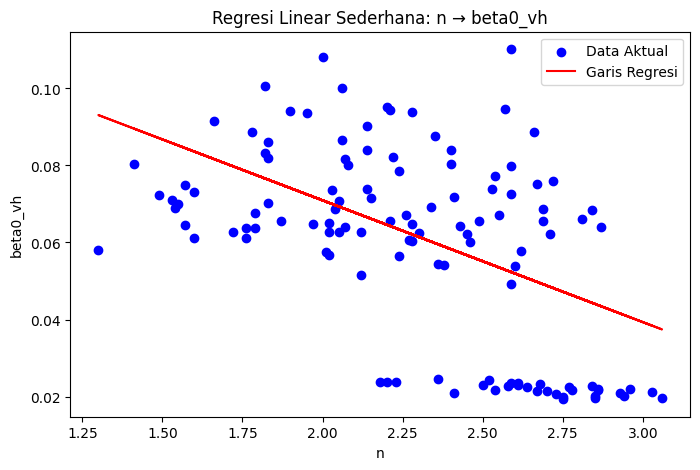

In [17]:
# Visualisasi
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color='blue', label='Data Aktual')
plt.plot(X_test, y_pred, color='red', label='Garis Regresi')
plt.xlabel(X_col)
plt.ylabel(y_col)
plt.title(f'Regresi Linear Sederhana: {X_col} → {y_col}')
plt.legend()
plt.show()